In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. Các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.model_selection import train_test_split
from itertools import product

In [ ]:
# 2. Đọc file dữ liệu chứng khoán VNDIRECT
df = pd.read_csv('/content/drive/MyDrive/1.PTDLKD/Dataset/VNDIRECT_STOCK.csv', index_col = 'Date', parse_dates=True)
#df = df[['Price']]
#df = df.dropna() # Drop missing values
#df = df.reset_index(drop=True) # Reset the index
df

<ipython-input-4-4b0f59b839ee>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv('/content/drive/MyDrive/1.PTDLKD/Dataset/VNDIRECT_STOCK.csv', index_col = 'Date', parse_dates=True)


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2017-01-12,16511.9,16477.2,16615.9,16338.4,1.06M,1.28%
2017-04-12,16997.5,16720.0,17309.7,16615.9,1.60M,2.94%
2017-05-12,16303.7,16997.5,16997.5,16303.7,2.36M,-4.08%
2017-06-12,16234.4,16234.4,16373.1,15748.7,2.62M,-0.43%
2017-07-12,15818.1,16303.7,16338.4,15679.3,1.07M,-2.56%
...,...,...,...,...,...,...
2023-08-06,18100.0,19200.0,19500.0,18100.0,66.28M,-5.97%
2023-09-06,18950.0,18300.0,19000.0,18100.0,43.03M,4.70%
2023-12-06,18850.0,19000.0,19050.0,18350.0,24.09M,-0.53%


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Price,1373.0,14755.429133,8039.411686,2578.0,8313.4,15288.0,19902.3,34784.3
Open,1373.0,14748.870284,8058.143012,2529.8,8313.4,15334.6,19838.0,35078.2
High,1373.0,15056.402039,8248.531148,2602.1,8372.8,15660.8,20275.3,36254.0
Low,1373.0,14446.206045,7870.182602,2517.7,8224.3,15008.3,19519.9,34294.4


In [ ]:
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

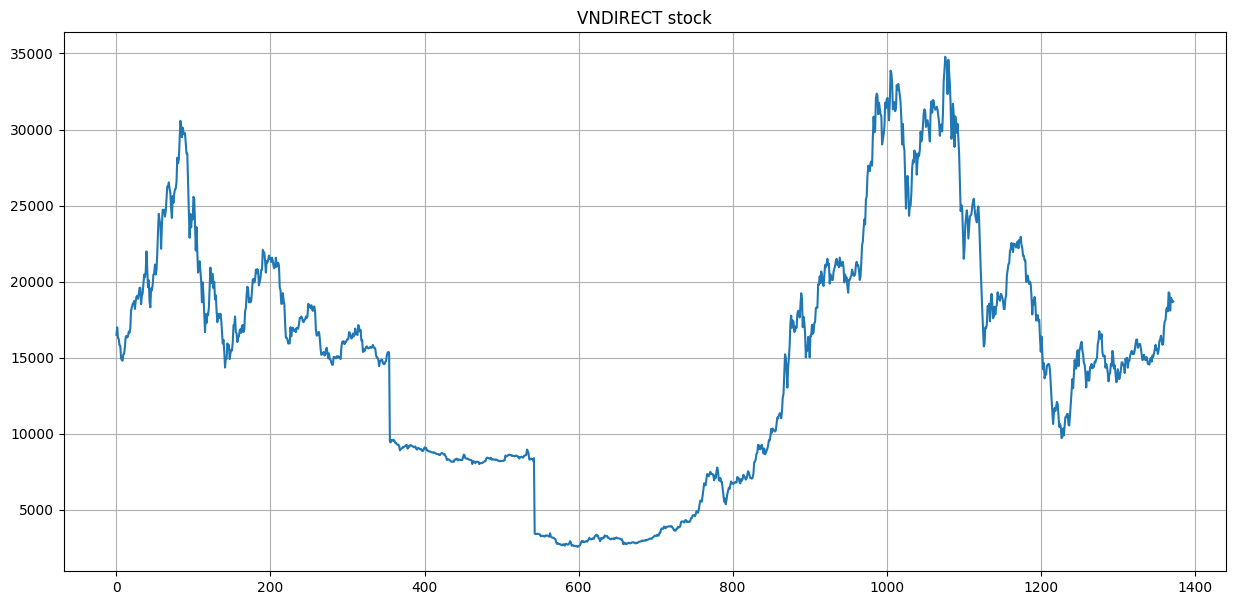

In [ ]:
plt.figure(figsize=(15, 7))
plt.plot(df)
plt.title('VNDIRECT stock')
plt.grid(True)
plt.show()

In [ ]:
#chia train test validate theo tỉ lệ 7:1:2
# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

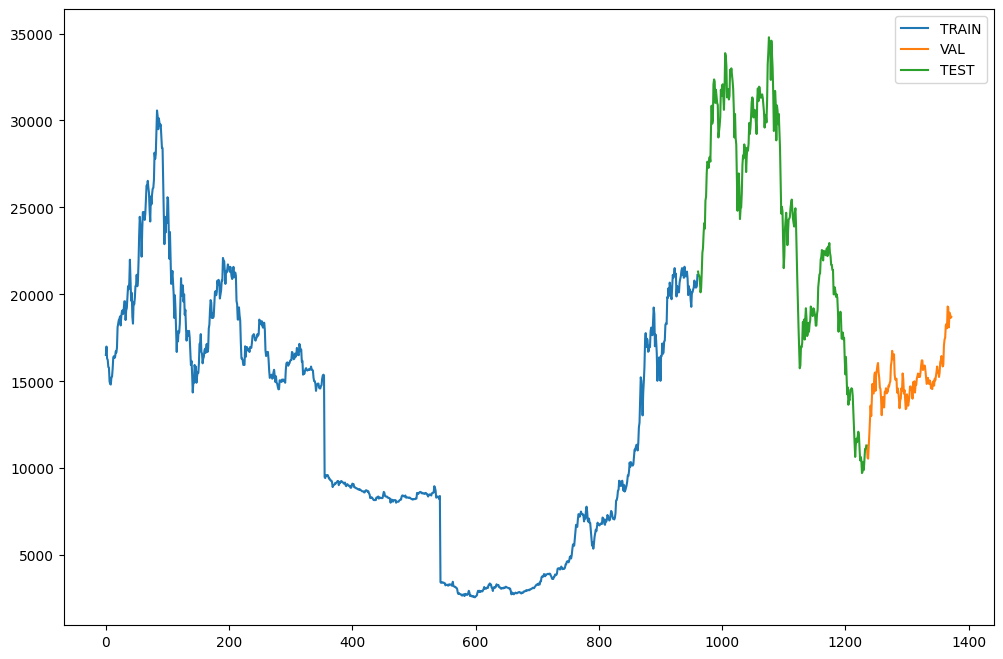

In [ ]:
train_data['Price'].plot(legend=True,label='TRAIN')
val_data['Price'].plot(legend=True,label='VAL')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8));

In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
# Fit Exponential Smoothing model (Holt-Winters Additive)
model = ExponentialSmoothing(y_train, seasonal_periods=7, trend='add', seasonal='add')
# Fit the model
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
# 4. Quá trình testing
x_test = test_data.index
y_test = test_data['Price']
y_test

961     21308.9
962     21070.4
963     21070.4
964     20752.3
965     20116.2
         ...   
1230     9900.0
1231    10550.0
1232    11100.0
1233    11100.0
1234    11300.0
Name: Price, Length: 274, dtype: float64

In [ ]:
# 3. Dự đoán trên tập test
y_pred_test = model_fit.predict(start=y_test.index[0], end=y_test.index[-1])

In [ ]:
# 5. Quá trình Validate
x_val = val_data.index
y_val = val_data['Price']

In [ ]:
# Dự đoán trên tập validate
y_pred_val = model_fit.predict(start=x_val[0], end=x_val[-1])

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 6 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model_fit.forecast(len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[20966.69377205 21082.20518913 20915.71075521 20882.44067796
 20875.73723288 20950.67324314 21005.36536    20885.42691451
 21000.93833159 20834.44389766 20801.17382041 20794.47037533
 20869.40638559 20924.09850245 20804.16005696 20919.67147404
 20753.17704011 20719.90696286 20713.20351778 20788.13952804
 20842.8316449  20722.89319941 20838.40461649 20671.91018257
 20638.64010531 20631.93666023 20706.8726705  20761.56478735
 20641.62634186 20757.13775894]


In [ ]:
# Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - val_data['Price'])**2))
test_rmse = np.sqrt(np.mean((y_pred_test - test_data['Price'])**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Validation RMSE: 2654.4455899477985
Testing RMSE: 7474.261203297793


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Đánh giá độ chính xác thuật toán bằng MAE
valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred_test)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)

Validation MAE: 2309.2790258747204
Testing MAE: 6217.245981641856


In [ ]:
# Đánh giá độ chính xác thuật toán bằng MAPE
valid_mape = (np.sum(np.abs((y_val-y_pred_val)/y_val))/len(y_val))*100
test_mape = (np.sum(np.abs((y_test-y_pred_test)/y_test))/len(y_test))*100
print(f"Validation MAPE: {valid_mape:.2f}%")
print(f"Testing MAPE: {test_mape:.2f}%")

Validation MAPE: 16.15%
Testing MAPE: 25.42%


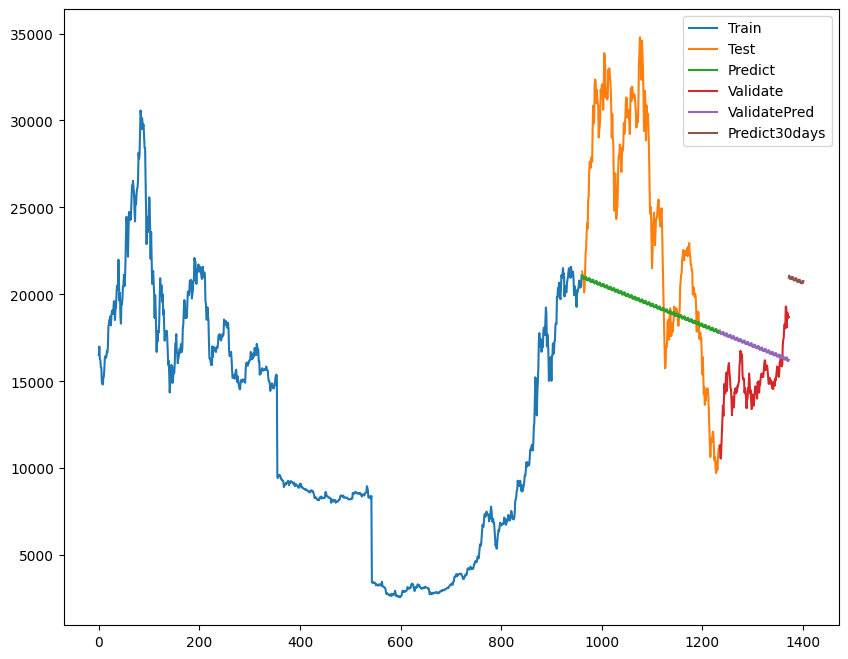

In [ ]:
# Vẽ hình
plt.figure(figsize=(10,8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data['Price'])
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,test_data['Price'])
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,val_data['Price'])
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index, y_pred_val)
predict_data_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
plt.plot(predict_data_index, y_next_30_days)
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()